In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import datetime as dt
import csv
from numpy import array

D:\Anaconda3\envs\Tensorflow_CPU\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\envs\Tensorflow_CPU\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Anaconda3\envs\Tensorflow_CPU\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


Open (2665,)


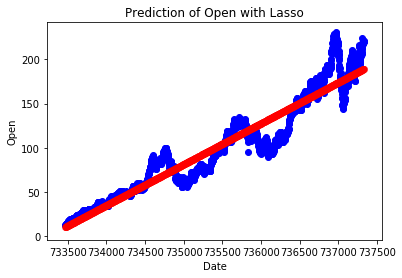

High (2665,)


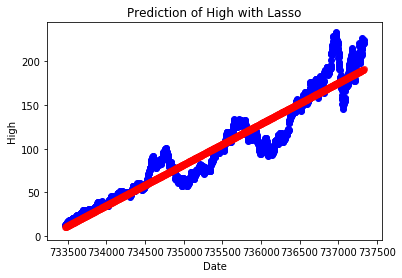

Low (2665,)


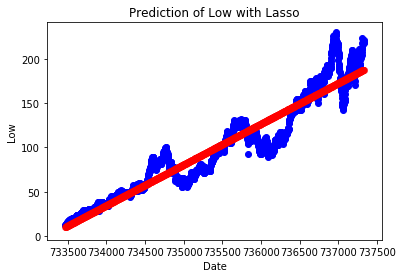

Close (2665,)


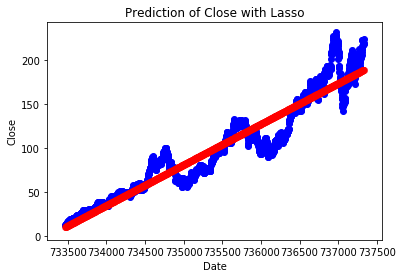

Adj Close (2665,)


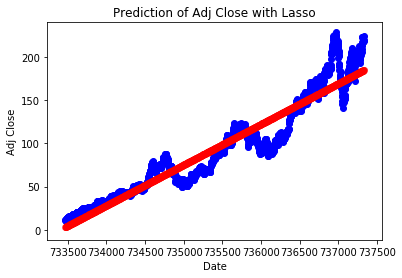

Volume (2665,)


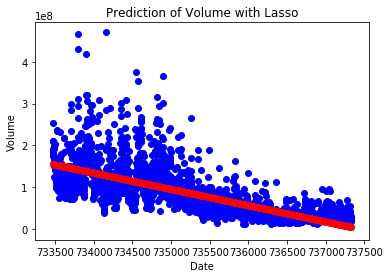

Open (1258,)


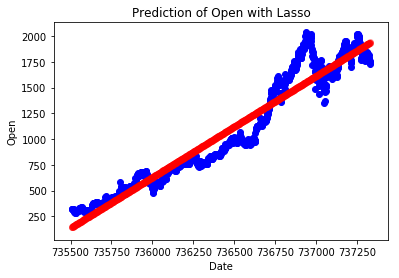

High (1258,)


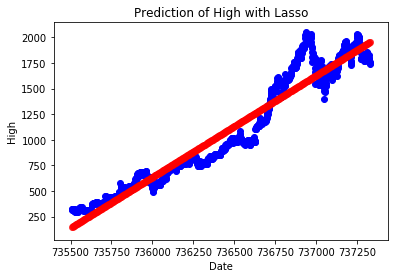

Low (1258,)


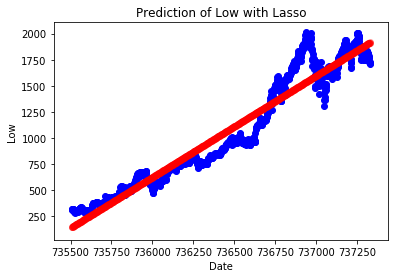

Close (1258,)


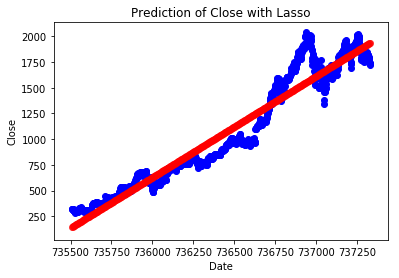

Adj Close (1258,)


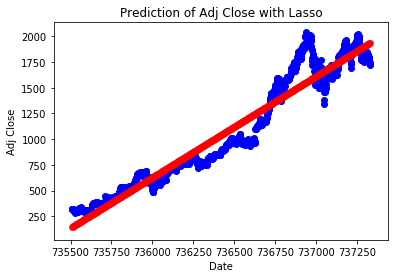

Volume (1258,)


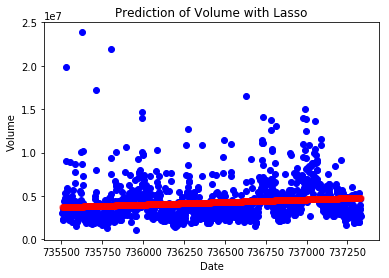

Open (3805,)


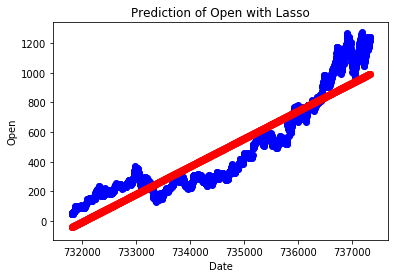

High (3805,)


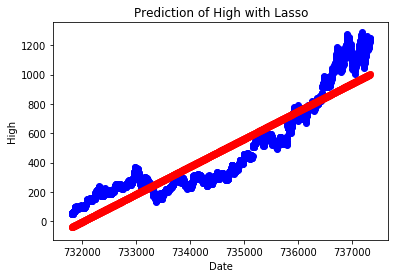

Low (3805,)


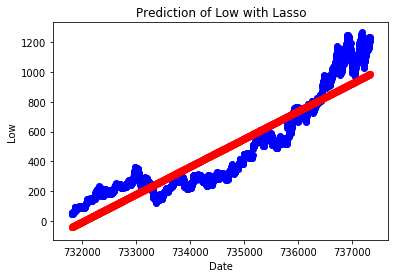

Close (3805,)


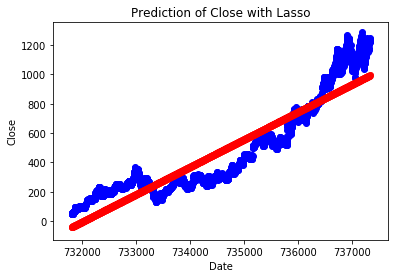

Adj Close (3805,)


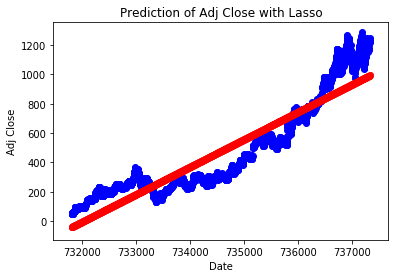

Volume (3805,)


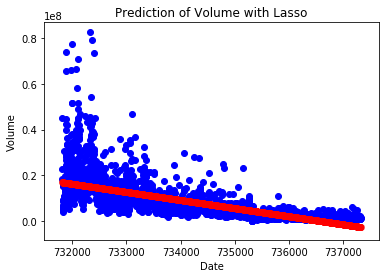

Open (1853,)


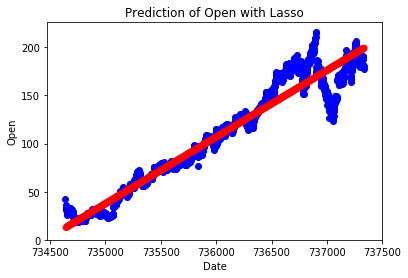

High (1853,)


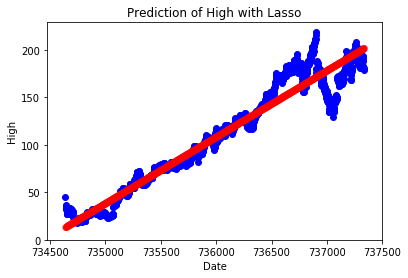

Low (1853,)


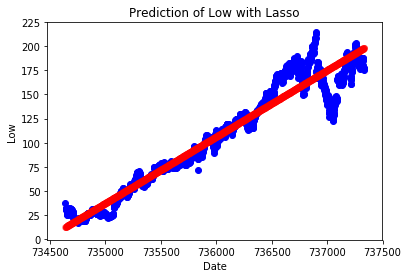

Close (1853,)


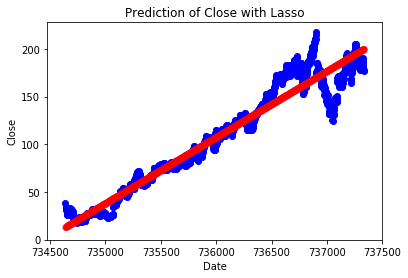

Adj Close (1853,)


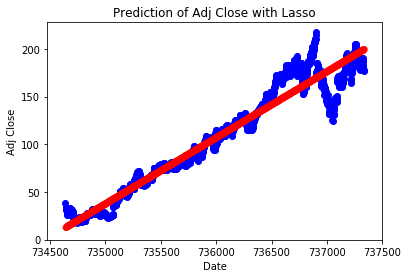

Volume (1853,)


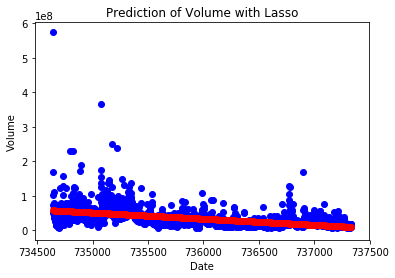

Open (1718,)


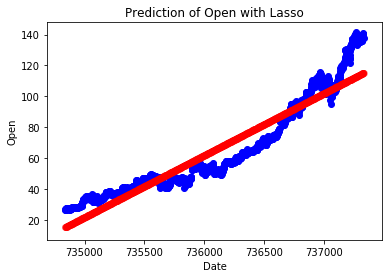

High (1718,)


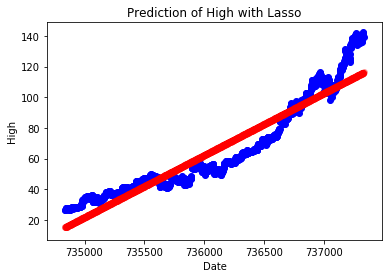

Low (1718,)


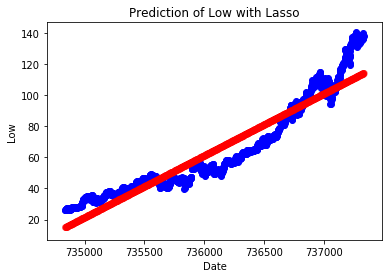

Close (1718,)


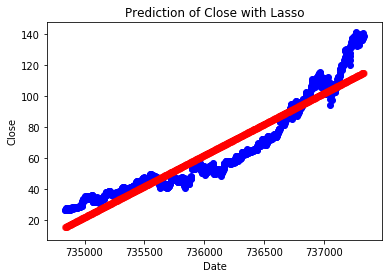

Adj Close (1718,)


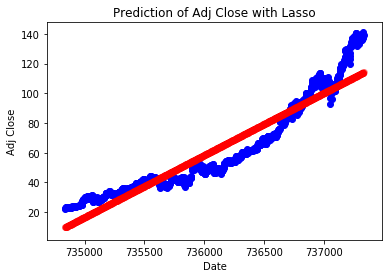

Volume (1718,)


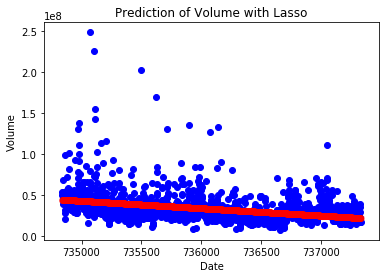

Open (1638,)


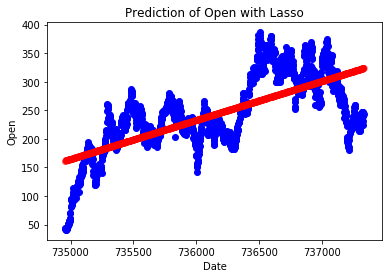

High (1638,)


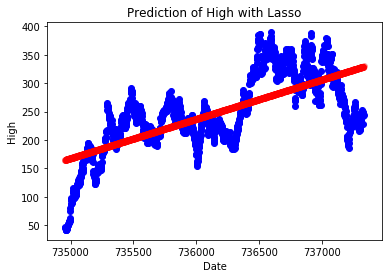

Low (1638,)


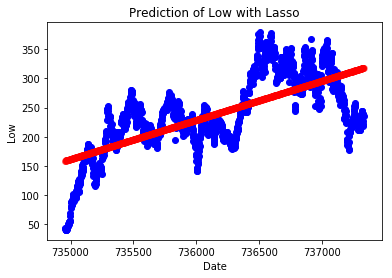

Close (1638,)


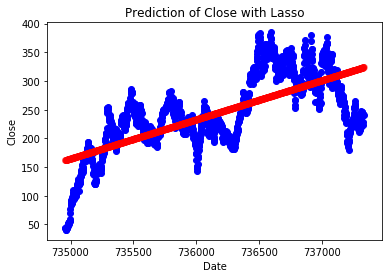

Adj Close (1638,)


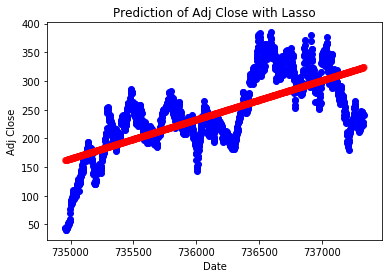

Volume (1638,)


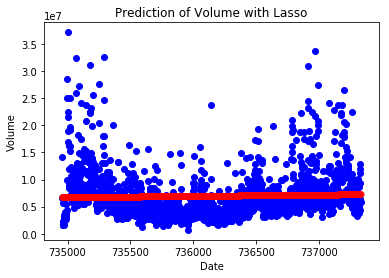

Open (1483,)


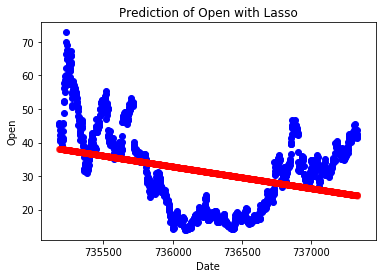

High (1483,)


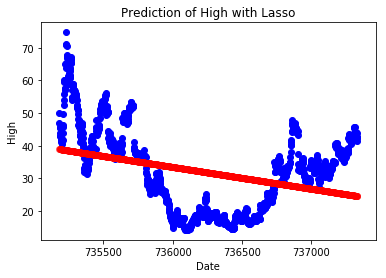

Low (1483,)


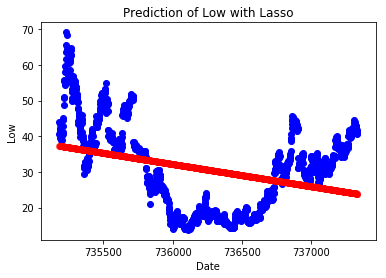

Close (1483,)


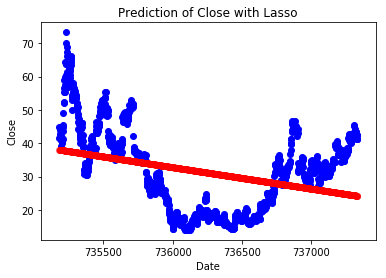

Adj Close (1483,)


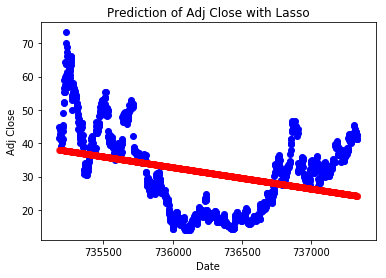

Volume (1483,)


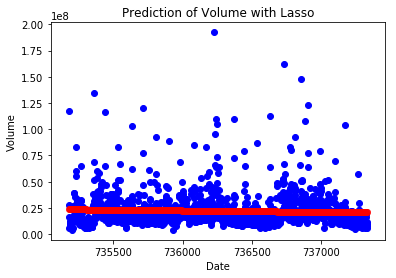

Open (711,)


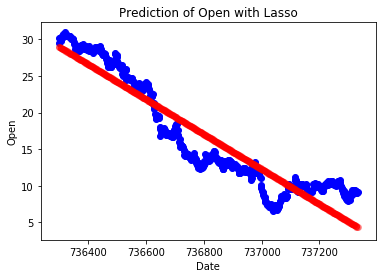

High (711,)


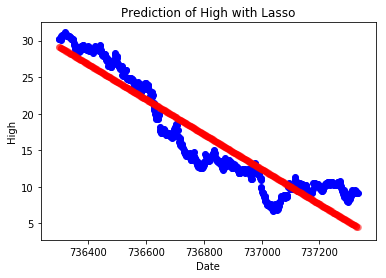

Low (711,)


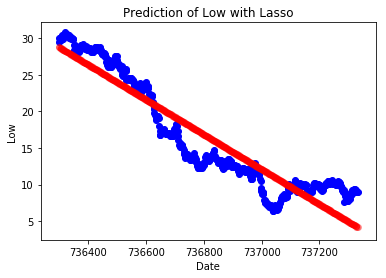

Close (711,)


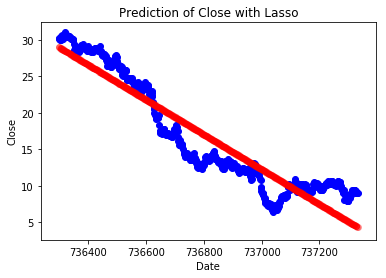

Adj Close (711,)


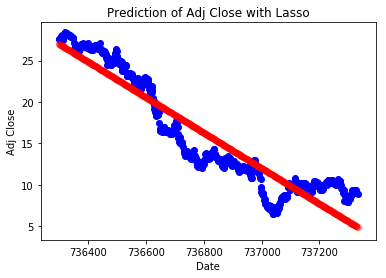

Volume (711,)


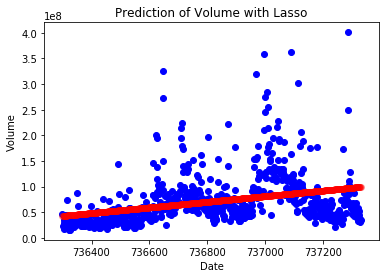

Open (9039,)


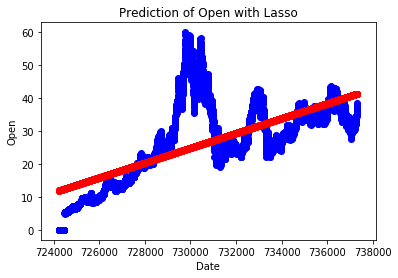

High (9039,)


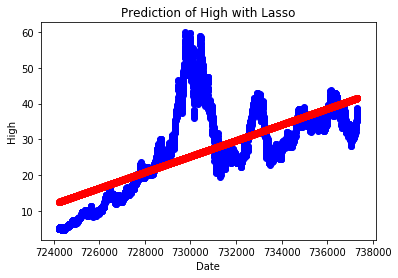

Low (9039,)


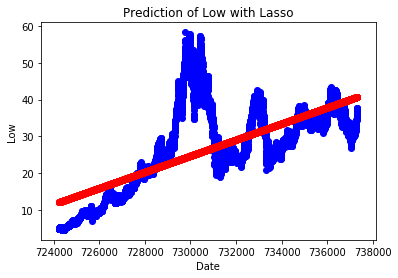

Close (9039,)


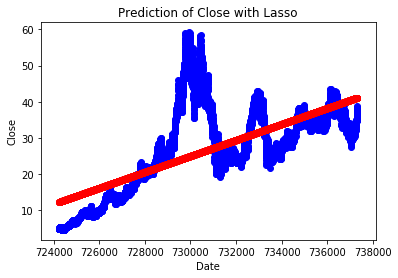

Adj Close (9039,)


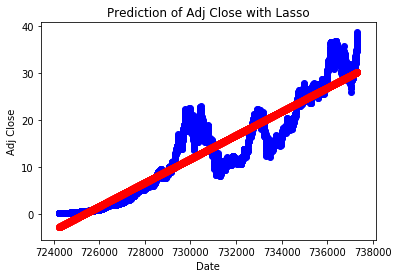

Volume (9039,)


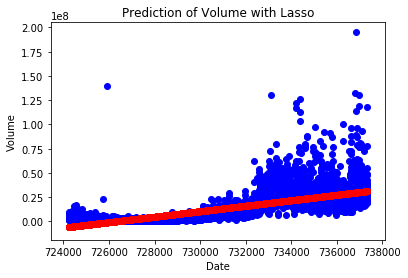

Open (4675,)


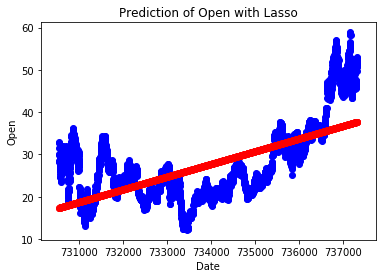

High (4675,)


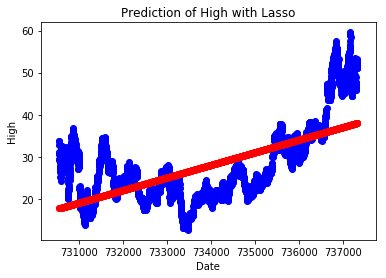

Low (4675,)


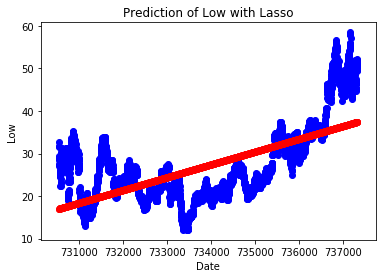

Close (4675,)


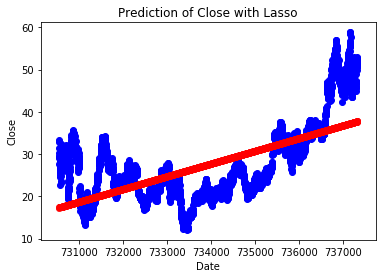

Adj Close (4675,)


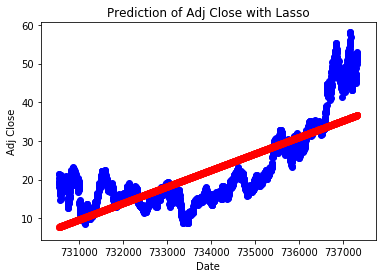

Volume (4675,)


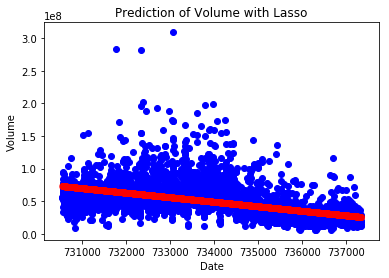

In [2]:
files = ['AAPL.csv','AMZN.csv','GOOG.csv','FB.csv','MSFT.csv','TSLA.csv','TWTR.csv','GE.csv','T.csv','INTC.csv']
fields = ['Open','High','Low','Close','Adj Close','Volume']

for file in files:
    #predictions = []
    filepath = './Historical Data/'+file
    DF = pd.read_csv(filepath,sep=",")
    #print(DF.head(2))
    DF['IntDate'] = pd.to_datetime(DF['Date'])
    #print(DF.head(2))
    #print(type(DF['IntDate'][0]))
    DF['IntDate']= DF['IntDate'].map(dt.datetime.toordinal)
    #print(DF.head(2))
    #print(type(DF['IntDate'][0]))
    x1 = DF['IntDate'].to_numpy()
    x1 = x1.reshape(-1,1)
    DFP = pd.DataFrame({
        'Date':['2019-10-01','2019-10-02','2019-10-03','2019-10-04','2019-10-05','2019-10-06','2019-10-07',
                '2019-10-08','2019-10-09','2019-10-10','2019-10-11','2019-10-12','2019-10-13','2019-10-14',
                '2019-10-15','2019-10-16','2019-10-17','2019-10-18','2019-10-19','2019-10-20','2019-10-21'],
    })

    # convert to int 
    DFP['IntDate'] = pd.to_datetime(DFP['Date'])
    DFP['IntDate']= DFP['IntDate'].map(dt.datetime.toordinal)
    x2=DFP['IntDate'].to_numpy()
    x2 = x2.reshape(-1,1)
    #print(x1.shape,x2.shape)
    for i in range(0,6):
        y = DF[fields[i]].to_numpy()

        lasso_reg=Lasso(alpha=0.8)
        lasso_reg.fit(x1,y)
        y_pred = lasso_reg.predict(x1) #prediction values
        y_pred2=lasso_reg.predict(x2)
        print(fields[i],y_pred.shape)
        %matplotlib inline
        #Plot historical data 
        plt.scatter(x1,y,color='blue',label='Raw Data')
        plt.scatter(x1,y_pred,color='red',label='Lasso Prediction',alpha=0.3)
        plt.xlabel('Date')
        plt.ylabel(fields[i])
        plt.title('Prediction of '+str(fields[i])+' with Lasso')
        plt.show()
        DFP[fields[i]+'_Prediction_Of_Lasso']=y_pred2
    #print('out of loop')
    DFP.to_csv(filepath.replace(".csv", "")+"_Lasso.csv",index=False)
    #output prediction data
    #linreg = LinearRegression()
    #print()
    #linreg.fit(x,y)
    #predictions.append() # generate prediction set

#output = filepath.replace(".csv", "")+"_Output_LinearRegression.csv"
#DFP['LinearRegression']=
#print(DFP.head())